# Business Objective

An E Commerce company or DTH (you can choose either of these two domains) provider is
facing a lot of competition in the current market and it has become a challenge to retain the
existing customers in the current situation. Hence, the company wants to develop a model
through which they can do churn prediction of the accounts and provide segmented offers to the
potential churners. In this company, account churn is a major thing because 1 account can have
multiple customers. hence by losing one account the company might be losing more than one
customer.
You have been assigned to develop a churn prediction model for this company and provide
business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because
your recommendation will go through the revenue assurance team. If they find that you are
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going
to approve your recommendation.
Hence be very careful while providing campaign recommendation.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Captsone/Customer_Churn_Data.xlsx')

In [ ]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


# Shape of the data

In [ ]:
df.shape

(11260, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
df.describe(include="all")

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.00000,11260.000000,11158.0,11148.000000,11158.000000,11151,11152,11162.000000,11148.0,11163,11144.000000,11048,11158.0,10903.000000,11260.0,11260.0,10903.0,10789.00,11039
unique,NaN,NaN,38.0,NaN,NaN,5,4,NaN,7.0,7,NaN,3,59.0,NaN,20.0,20.0,24.0,5693.00,3
top,NaN,NaN,1.0,NaN,NaN,Debit Card,Male,NaN,4.0,Super,NaN,Married,3.0,NaN,14.0,1.0,3.0,155.62,Mobile
freq,NaN,NaN,1351.0,NaN,NaN,4587,6328,NaN,4569.0,4062,NaN,5860,1746.0,NaN,1524.0,4373.0,1816.0,10.00,7482
mean,25629.50000,0.168384,NaN,1.653929,17.867091,NaN,NaN,2.902526,NaN,NaN,3.066493,NaN,NaN,0.285334,NaN,NaN,NaN,NaN,NaN
std,3250.62635,0.374223,NaN,0.915015,8.853269,NaN,NaN,0.725584,NaN,NaN,1.379772,NaN,NaN,0.451594,NaN,NaN,NaN,NaN,NaN
min,20000.00000,0.000000,NaN,1.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,22814.75000,0.000000,NaN,1.000000,11.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,25629.50000,0.000000,NaN,1.000000,16.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,28444.25000,0.000000,NaN,3.000000,23.000000,NaN,NaN,3.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


# Missing Values

In [ ]:
df.isnull().sum()

,0
AccountID,0
Churn,0
Tenure,102
City_Tier,112
CC_Contacted_LY,102
Payment,109
Gender,108
Service_Score,98
Account_user_count,112
account_segment,97


# Data types and Missing values

In [ ]:
# Make a copy of the original DataFrame for cleaning
df_clean = df.copy()

# Convert columns that should be numeric
cols_to_convert = [
    'Tenure', 'Account_user_count', 'rev_per_month',
    'rev_growth_yoy', 'cashback', 'Day_Since_CC_connect'
]

# Convert object columns to numeric, coerce errors to NaN
for col in cols_to_convert:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Strip any leading/trailing whitespace in object columns
df_clean = df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check updated data types and missing values
df_clean.info(), df_clean[cols_to_convert].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

/tmp/ipython-input-2320255652.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)


(None,
 Tenure                  218
 Account_user_count      444
 rev_per_month           791
 rev_growth_yoy            3
 cashback                473
 Day_Since_CC_connect    358
 dtype: int64)

In [ ]:
df_clean = df_clean.drop('AccountID', axis=1)
df_clean = df_clean.drop('Service_Score', axis=1)

In [ ]:
display(df_clean.head())

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,Super,2.0,Single,9.0,1.0,11.0,1,5.0,159.93,Mobile
1,1,0.0,1.0,8.0,UPI,Male,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0,0.0,120.90,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0,3.0,NaN,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,4.0,Super,5.0,Single,8.0,0.0,23.0,0,3.0,134.07,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1,3.0,129.60,Mobile


**The AccountID & Service_Score column was removed from the dataset as it carries no predictive information**

# Impute missing numeric values with median

In [ ]:
# Impute numeric columns with median
num_cols_median = ['Tenure', 'Account_user_count', 'rev_per_month',
                   'rev_growth_yoy', 'cashback', 'Day_Since_CC_connect']
for col in num_cols_median:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

print(df_clean[num_cols_median].isnull().sum())

# Impute categorical columns with mode
cat_cols_mode = ['City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
                 'account_segment', 'CC_Agent_Score', 'Marital_Status',
                 'Login_device']
for col in cat_cols_mode:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print(df_clean[cat_cols_mode].isnull().sum())

# Impute binary column (complain) with 0 (assume no complaint if missing)
df_clean['Complain_ly'].fillna(0, inplace=True)

print(df_clean['Complain_ly'].isnull().sum())

Tenure                  0
Account_user_count      0
rev_per_month           0
rev_growth_yoy          0
cashback                0
Day_Since_CC_connect    0
dtype: int64
City_Tier          0
CC_Contacted_LY    0
Payment            0
Gender             0
account_segment    0
CC_Agent_Score     0
Marital_Status     0
Login_device       0
dtype: int64
0


/tmp/ipython-input-3644045009.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-3644045009.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
df_clean.isnull().sum()

,0
Churn,0
Tenure,0
City_Tier,0
CC_Contacted_LY,0
Payment,0
Gender,0
Account_user_count,0
account_segment,0
CC_Agent_Score,0
Marital_Status,0


In [ ]:
# # Threshold for dropping (20% missing values)
# row_thresh = int(df_clean.shape[1] * 0.8)  # Keep rows with at least 80% non-null values
# col_thresh = int(df_clean.shape[0] * 0.8)  # Keep columns with at least 80% non-null values

# # Drop rows and columns
# df_clean.dropna(axis=0, thresh=row_thresh, inplace=True)
# df_clean.dropna(axis=1, thresh=col_thresh, inplace=True)

# # Optional: Reset index after dropping rows
# df_clean.reset_index(drop=True, inplace=True)

In [ ]:
df_clean.shape

(11260, 17)

# Summary Statistics

In [ ]:
# Set up the style for plots
sns.set(style="whitegrid")

# Summary statistics
summary_stats = df_clean.describe(include='all')

summary_stats

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.000000,11260.000000,11260.000000,11260.000000,11260,11260,11260.000000,11260,11260.000000,11260,11260.000000,11260.000000,11260.000000,11260.0,11260.000000,11260.000000,11260
unique,NaN,NaN,NaN,NaN,5,4,NaN,7,NaN,3,NaN,NaN,NaN,20.0,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Debit Card,Male,NaN,Super,NaN,Married,NaN,NaN,NaN,1.0,NaN,NaN,Mobile
freq,NaN,NaN,NaN,NaN,4696,6436,NaN,4159,NaN,6072,NaN,NaN,NaN,4373.0,NaN,NaN,7703
mean,0.168384,10.985879,1.647425,17.832060,NaN,NaN,3.704973,NaN,3.065808,NaN,6.266874,0.276288,16.193073,NaN,4.581261,194.934722,NaN
std,0.374223,12.757534,0.912763,8.820689,NaN,NaN,1.004383,NaN,1.372663,NaN,11.488990,0.447181,3.757271,NaN,3.649643,174.977865,NaN
min,0.000000,0.000000,1.000000,4.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,0.000000,4.000000,NaN,0.000000,0.000000,NaN
25%,0.000000,2.000000,1.000000,11.000000,NaN,NaN,3.000000,NaN,2.000000,NaN,3.000000,0.000000,13.000000,NaN,2.000000,147.890000,NaN
50%,0.000000,9.000000,1.000000,16.000000,NaN,NaN,4.000000,NaN,3.000000,NaN,5.000000,0.000000,15.000000,NaN,3.000000,165.250000,NaN
75%,0.000000,16.000000,3.000000,23.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,7.000000,1.000000,19.000000,NaN,7.000000,197.310000,NaN


# Univariate analysis

/tmp/ipython-input-3113916800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Churn', palette='Set2')


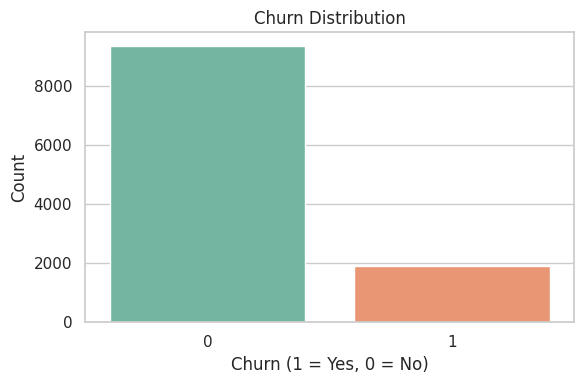

In [ ]:
# Plot 1: Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

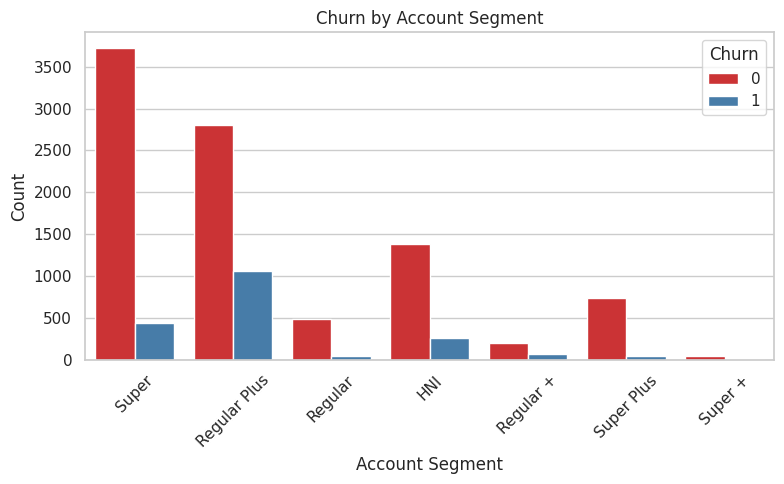

In [ ]:
# Plot 2: Churn by Account Segment
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='account_segment', hue='Churn', palette='Set1')
plt.title('Churn by Account Segment')
plt.xlabel('Account Segment')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


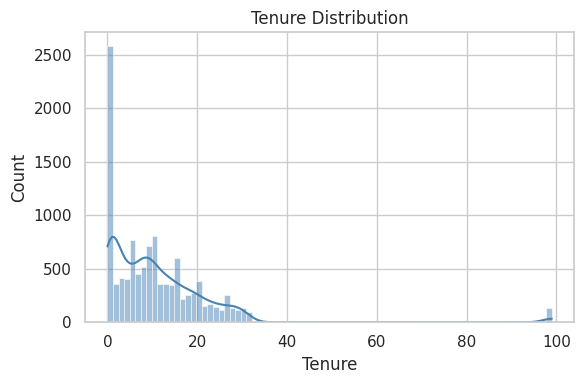

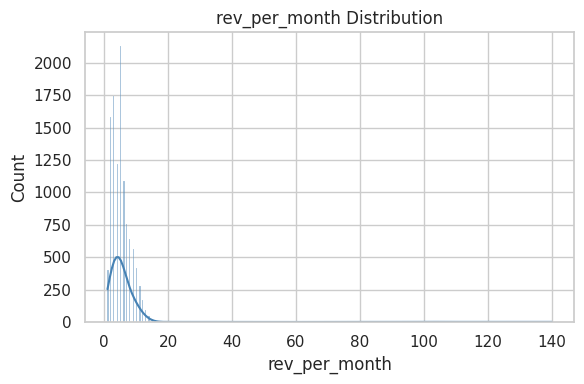

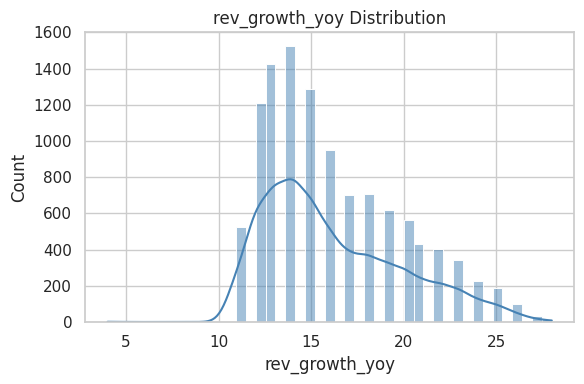

/tmp/ipython-input-977653330.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=col, palette='pastel')


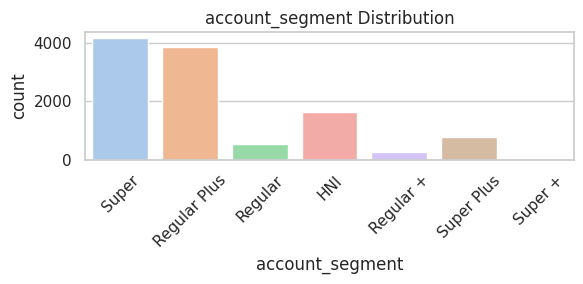

/tmp/ipython-input-977653330.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=col, palette='pastel')


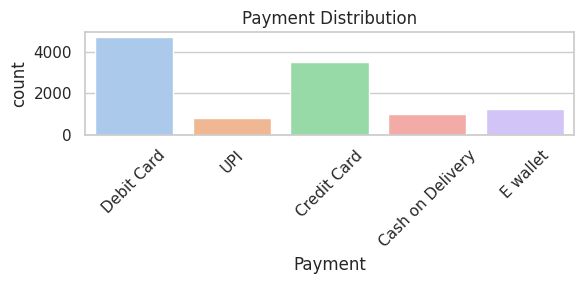

/tmp/ipython-input-977653330.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=col, palette='pastel')


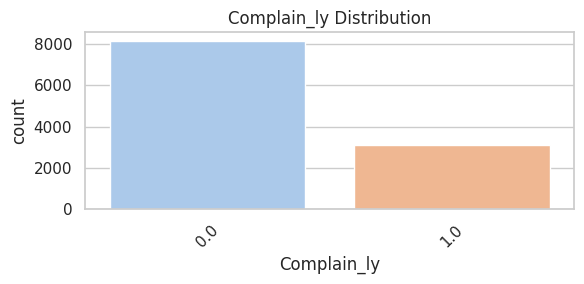

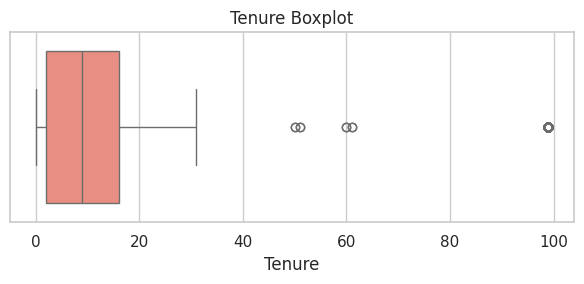

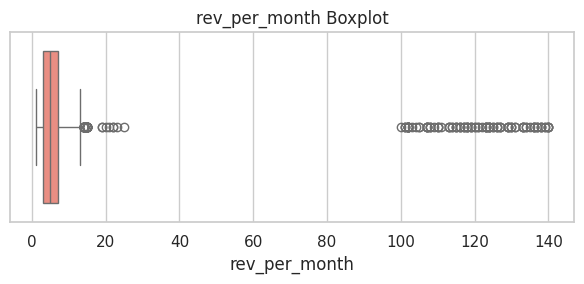

In [ ]:
# Plot 3: Distribution Shape & Skewness

df_clean[['Tenure', 'rev_per_month', 'rev_growth_yoy']].skew()

for col in ['Tenure', 'rev_per_month', 'rev_growth_yoy']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], kde=True, color='steelblue')
    plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()

cat_cols = ['account_segment', 'Payment', 'Complain_ly']

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df_clean, x=col, palette='pastel')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
for col in ['Tenure', 'rev_per_month']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_clean[col], color='salmon')
    plt.title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()

1.Histograms and boxplots were used to assess distributions of numeric
features. Countplots summarized categorical variables like Churn and account_segment.

2.The churn distribution shows that the majority of accounts are not churning.
Account segments have varying numbers of accounts, with 'Super' being the most frequent.




3.Numeric features like Tenure and revenue per month show skewed distributions, indicating the presence of outliers or a non-normal distribution. Boxplots further highlight the presence of outliers in these features.

4.The distribution of categorical variables like Payment and Complain_ly provides insights into the most common payment methods and the frequency of complaints.








# Bivariate Analysis

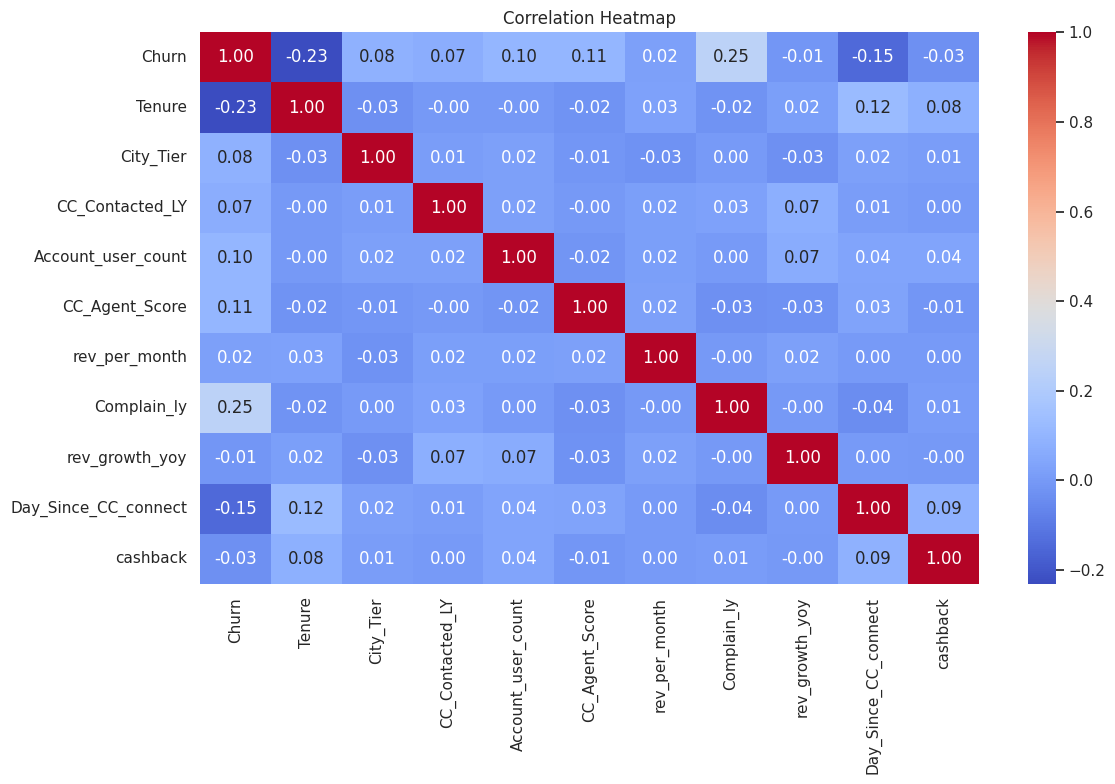

In [ ]:
# Plot 4: Correlation heatmap of numeric features
plt.figure(figsize=(12, 8))
numeric_corr = df_clean.select_dtypes(include='number').corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3688350805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='rev_per_month', data=df_clean, palette='pastel')


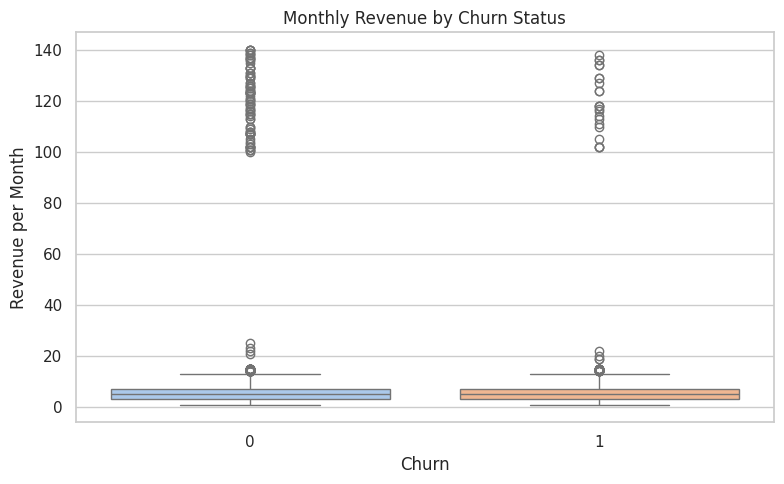

In [ ]:
# Plot 5: Churn vs Revenue
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='rev_per_month', data=df_clean, palette='pastel')
plt.title('Monthly Revenue by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Revenue per Month')
plt.tight_layout()
plt.show()


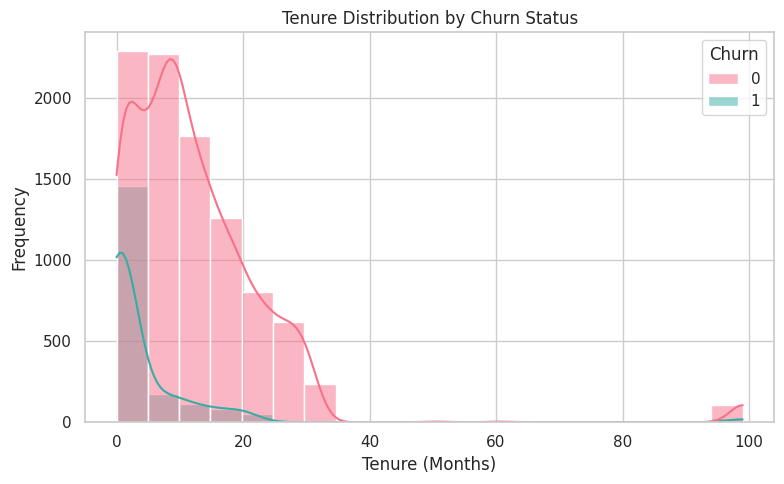

In [ ]:
# Plot 6: Distribution of Tenure
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='Tenure', hue='Churn', bins=20, kde=True, palette='husl')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1373708685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clean, palette='Set2')


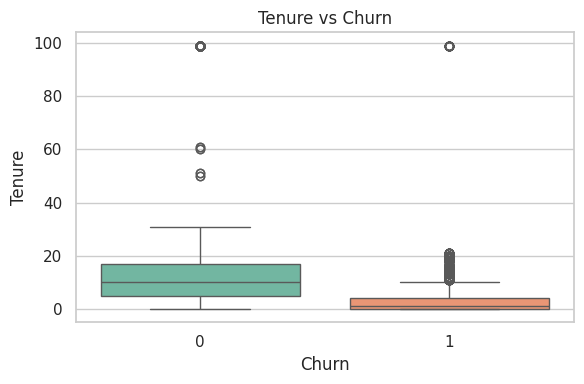

/tmp/ipython-input-1373708685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clean, palette='Set2')


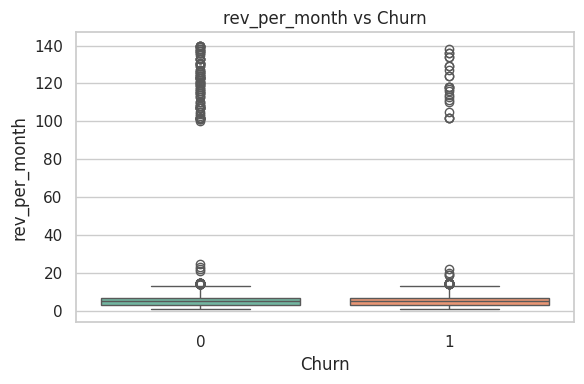

/tmp/ipython-input-1373708685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clean, palette='Set2')


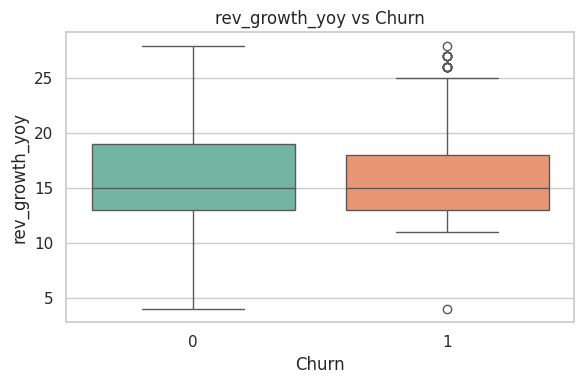

In [ ]:
# Plot 7: Tenure vs Rev_per month &  Tenure vs Rev_growth_yoy

for col in ['Tenure', 'rev_per_month', 'rev_growth_yoy']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df_clean, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()

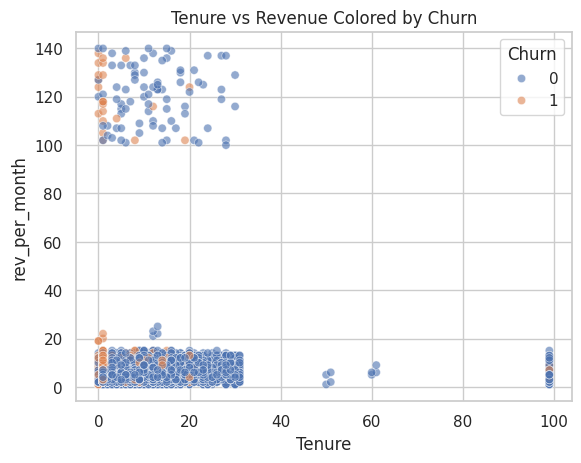

In [ ]:
# Plot 8: ScatterPlot Tenure vs Rev_per_month
sns.scatterplot(data=df_clean, x='Tenure', y='rev_per_month', hue='Churn', alpha=0.6)
plt.title('Tenure vs Revenue Colored by Churn')
plt.show()

Relationships between Churn and variables like Tenure, rev_per_month, and account_segment were analyzed using boxplots and heatmaps.

*   The correlation heatmap shows the relationships between numeric features, including Churn.
*   Tenure has a moderate negative correlation with Churn, suggesting that longer-term customers are less likely to churn.
*   Complain\_ly has a positive correlation with Churn, indicating that customers who complained in the last year are more likely to churn.
*   The boxplot of Monthly Revenue by Churn Status suggests that churned customers might have slightly higher median revenue, although the distributions overlap significantly.
*   The Tenure Distribution by Churn Status histogram visually reinforces that churn is more prevalent among customers with lower tenure.
*   The scatter plot of Tenure vs. Revenue colored by Churn shows clusters of churned customers at lower tenures across different revenue levels.
*   The engineered features 'is\_high\_risk' and 'complain\_lowscore' show a positive correlation with Churn, as expected.

# Churn Mean :- Tenure, Rev_per_month, Rev_per_user

In [ ]:
# Revenue per user
df_clean['rev_per_user'] = df_clean['rev_per_month'] / df_clean['Account_user_count']

df_clean.groupby('Churn')[['Tenure', 'rev_per_month', 'rev_per_user']].mean()

,Tenure,rev_per_month,rev_per_user
Churn,,,
0,12.310124,6.152499,1.896839
1,4.445675,6.831751,1.902461


Churned accounts actually spend slightly more than non-churned ones. This means revenue alone isn't keeping them — other issues like poor service or support might be the reason. Just giving discounts may not be enough to retain these customers.

# Outlier Treatment

In [ ]:
# Outlier Treatment using IQR Method
numeric_cols = ['Tenure', 'rev_per_month', 'rev_growth_yoy',
                'cashback', 'Day_Since_CC_connect']

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
# Revenue per user
df_clean['rev_per_user'] = df_clean['rev_per_month'] / df_clean['Account_user_count']

# Tenure bins
df_clean['tenure_group'] = pd.cut(
    df_clean['Tenure'],
    bins=[0, 6, 12, 24, 36, 60, np.inf], # Use np.inf to ensure the last bin is always the maximum
    labels=['0-6', '6-12', '12-24', '24-36', '36-60', '60+'],
    right=False # Include the left bin edge
)

# High risk category: short tenure + low agent score
df_clean['is_high_risk'] = ((df_clean['Tenure'] < 6) &
                            (df_clean['CC_Agent_Score'] <= 2)).astype(int)

# Interaction feature: Complainers with low satisfaction
df_clean['complain_lowscore'] = ((df_clean['Complain_ly'] == 1) &
                                 (df_clean['CC_Agent_Score'] <= 2)).astype(int)

print(df_clean.head())

   Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Account_user_count account_segment  CC_Agent_Score Marital_Status  ...  \
0                 3.0           Super             2.0         Single  ...   
1                 4.0    Regular Plus             3.0         Single  ...   
2                 4.0    Regular Plus             3.0         Single  ...   
3                 4.0           Super             5.0         Single  ...   
4                 3.0    Regular Plus             5.0         Single  ...   

   Complain_ly  rev_growth_yoy  coupon_used_for_payment Day_Since_CC_connect  \
0          1.0            11.0            

The Interquartile Range (IQR) method was applied to cap extreme values in the following numeric columns: 'Tenure', 'rev_per_month', 'rev_growth_yoy', 'cashback', and 'Day_Since_CC_connect'. This method identifies outliers as values falling below Q1 - 1.5\*IQR or above Q3 + 1.5\*IQR and replaces them with the respective lower or upper bound. This helps to mitigate the impact of extreme values on the downstream analysis and model building.

# Variable Transformation Code

In [ ]:
df_clean['rev_per_month_log'] = np.log1p(df_clean['rev_per_month'])
df_clean['cashback_log'] = np.log1p(df_clean['cashback'])

In [ ]:
# Convert object columns to numeric, coercing errors to NaN
cols_to_convert = ['Tenure', 'Account_user_count', 'rev_per_month',
                   'rev_growth_yoy', 'cashback', 'Day_Since_CC_connect']
for col in cols_to_convert:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Strip whitespace from string values in the entire DataFrame
df_clean = df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Handle outliers using IQR method (example for one column; can be looped for all numeric)
for col in cols_to_convert:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
df_clean.head()

/tmp/ipython-input-922977452.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,...,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_user,tenure_group,is_high_risk,complain_lowscore,rev_per_month_log,cashback_log
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,Super,2.0,Single,...,1,5.0,159.93,Mobile,3.00,0-6,1,1,2.302585,5.080969
1,1,0.0,1.0,8.0,UPI,Male,4.0,Regular Plus,3.0,Single,...,0,0.0,120.90,Mobile,1.75,0-6,0,0,2.079442,4.803201
2,1,0.0,1.0,30.0,Debit Card,Male,4.0,Regular Plus,3.0,Single,...,0,3.0,165.25,Mobile,1.50,0-6,0,0,1.945910,5.113493
3,1,0.0,3.0,15.0,Debit Card,Male,4.0,Super,5.0,Single,...,0,3.0,134.07,Mobile,2.00,0-6,0,0,2.197225,4.905793
4,1,0.0,1.0,12.0,Credit Card,Male,3.0,Regular Plus,5.0,Single,...,1,3.0,129.60,Mobile,1.00,0-6,0,0,1.386294,4.872139


/tmp/ipython-input-1564664624.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='tenure_group', y='Churn', palette='pastel')


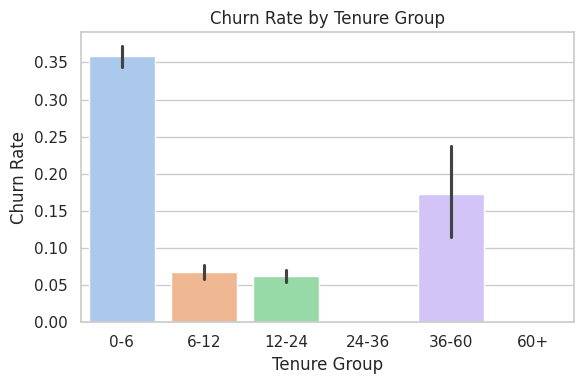

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot: Churn rate by tenure group
plt.figure(figsize=(6, 4))
sns.barplot(data=df_clean, x='tenure_group', y='Churn', palette='pastel')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group')
plt.tight_layout()
plt.show()


/tmp/ipython-input-520441827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='is_high_risk', y='Churn', palette='muted')


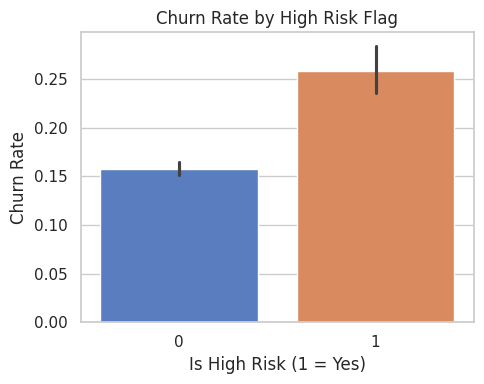

In [ ]:
# Plot: Churn rate by is_high_risk flag
plt.figure(figsize=(5, 4))
sns.barplot(data=df_clean, x='is_high_risk', y='Churn', palette='muted')
plt.title('Churn Rate by High Risk Flag')
plt.ylabel('Churn Rate')
plt.xlabel('Is High Risk (1 = Yes)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1760720089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='complain_lowscore', y='Churn', palette='Set2')


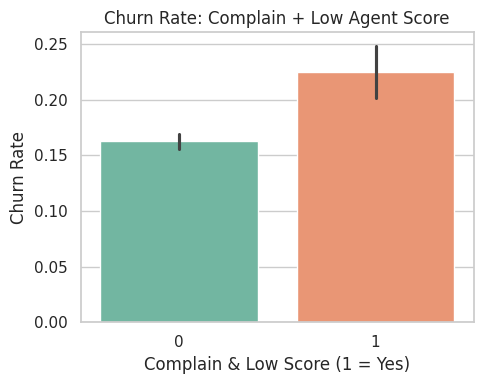

In [ ]:
# Plot: Churn rate by complain_lowscore flag
plt.figure(figsize=(5, 4))
sns.barplot(data=df_clean, x='complain_lowscore', y='Churn', palette='Set2')
plt.title('Churn Rate: Complain + Low Agent Score')
plt.ylabel('Churn Rate')
plt.xlabel('Complain & Low Score (1 = Yes)')
plt.tight_layout()
plt.show()

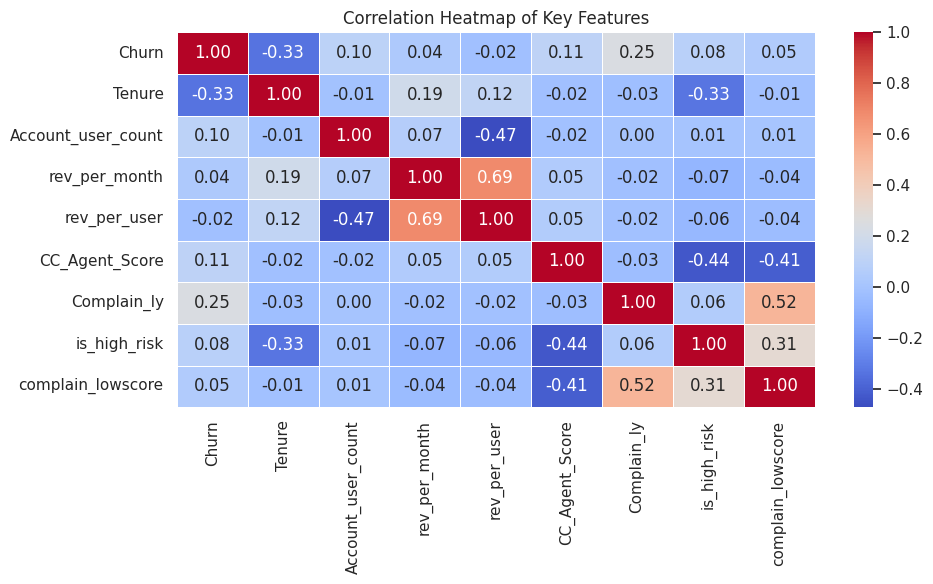

In [ ]:
# Select relevant numeric columns for correlation
corr_features = ['Churn', 'Tenure', 'Account_user_count', 'rev_per_month',
                 'rev_per_user', 'CC_Agent_Score', 'Complain_ly',
                 'is_high_risk', 'complain_lowscore']

# Compute correlation matrix
corr_matrix = df_clean[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

Logarithmic transformations were applied to 'rev\_per\_month' and 'cashback' using `np.log1p()`. This is done to handle the skewed distributions of these features, which can help in stabilizing variance and making the data more suitable for certain machine learning models. `np.log1p(x)` calculates log(1+x), which is useful for handling zero values gracefully.

# **Business insights from EDA**

**Focus on Early Customer Engagement:**
Many customers churn within the first few months. Improve onboarding and engagement early to build loyalty and reduce early drop-offs.

**Improve Complaint Resolution & Support Quality:**
Customers who complain and rate support poorly are much more likely to leave. Invest in better agent training and faster complaint resolution to retain them.

**Don’t Assume High-Spending Customers Will Stay:**
Churned accounts often spend more than retained ones. These customers need personalized attention and service—not just discounts—to stay loyal.

**Segment-Specific Retention Strategies:**
Different account segments have different churn rates. Design custom retention plans for each segment instead of a single strategy for all.

**Use Payment & Device Data for Personalization:**
While not primary churn drivers, knowing a customer’s preferred payment mode or device can help tailor offers, communication, and user experience.

# **WEEK_2**

# 1) Model building and interpretation.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
# Drop non-informative columns
df_model = df_clean.drop(columns=['AccountID'], errors='ignore')

# Define features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Dummy encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Fit models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



Model: Logistic Regression
[[1808   65]
 [ 158  221]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1873
           1       0.77      0.58      0.66       379

    accuracy                           0.90      2252
   macro avg       0.85      0.77      0.80      2252
weighted avg       0.89      0.90      0.90      2252

ROC AUC: 0.8988528837092018

Model: Decision Tree
[[1818   55]
 [  65  314]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1873
           1       0.85      0.83      0.84       379

    accuracy                           0.95      2252
   macro avg       0.91      0.90      0.90      2252
weighted avg       0.95      0.95      0.95      2252

ROC AUC: 0.8995656932918419

Model: Random Forest
[[1863   10]
 [  75  304]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1873
           1       0.97     

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:06:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
[[1853   20]
 [  51  328]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1873
           1       0.94      0.87      0.90       379

    accuracy                           0.97      2252
   macro avg       0.96      0.93      0.94      2252
weighted avg       0.97      0.97      0.97      2252

ROC AUC: 0.9896304519015533


**Plot ROC Curves for Model Comparison**

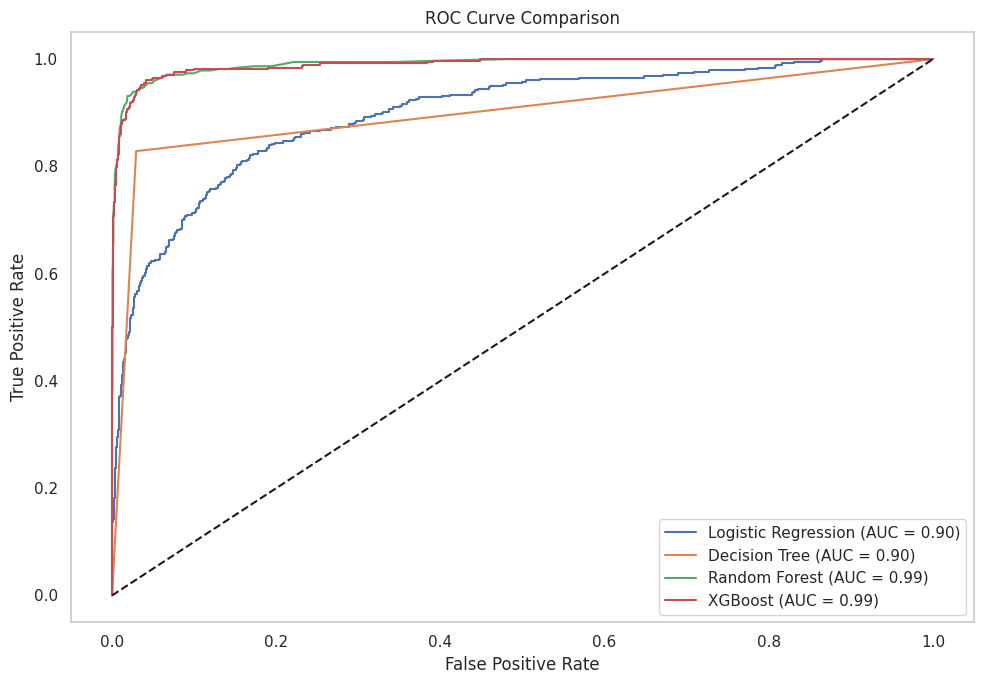

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curves
plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


This code plots the ROC (Receiver Operating Characteristic) curves for all the machine learning models to visually compare their performance in predicting customer churn. For each model, it calculates the true positive rate and false positive rate at different thresholds, then plots them to form a curve. The area under each curve (AUC) is also shown, which indicates how well the model distinguishes between churners and non-churners—the closer the AUC is to 1, the better the model performs. By displaying all ROC curves on one graph, this visualization helps identify which model is the most effective at churn prediction.

# Basic Model Interpretation

**For Logistic Regression**

In [ ]:
lr = models['Logistic Regression']
coef = pd.Series(lr.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("Top 10 Most Influential Features (Logistic Regression):")
print(coef.head(10))

Top 10 Most Influential Features (Logistic Regression):
Tenure                  -2.397136
tenure_group_24-36      -1.096447
tenure_group_36-60       0.919243
Complain_ly              0.809498
account_segment_Super   -0.666337
tenure_group_12-24       0.564509
Payment_Credit Card     -0.323189
City_Tier                0.322599
Account_user_count       0.319316
Marital_Status_Single    0.316940
dtype: float64



*   Tenure: Negative coefficient — longer-tenured users are less likely to churn.


*   CC_Agent_Score: Negative — better support experience lowers churn risk.


*   Complain_ly: Positive — users who complained are more likely to leave.







**For Random Forest**

In [ ]:
rf = models['Random Forest']
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features (Random Forest):")
print(importances.head(10))

Top 10 Important Features (Random Forest):
Tenure                  0.188386
cashback                0.063604
cashback_log            0.060107
Day_Since_CC_connect    0.057867
Complain_ly             0.056335
CC_Contacted_LY         0.055998
rev_growth_yoy          0.048040
CC_Agent_Score          0.042116
rev_per_user            0.037011
rev_per_month_log       0.031994
dtype: float64




*   Tenure, rev_per_month, and Service_Score are among the top features.


*   rev_per_user: Important despite being a derived metric — shows revenue concentration.
*   account_segment: Different segments show different churn patterns.





**For XGBoost**

In [ ]:
feature_names = X.columns
xgb_model = models['XGBoost']
xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_names)
xgb_importance = xgb_importance.sort_values(ascending=False)
print("Top 10 Important Features (XGBoost):")
print(xgb_importance.head(10))

Top 10 Important Features (XGBoost):
Tenure                          0.112211
Complain_ly                     0.075468
tenure_group_24-36              0.072562
account_segment_Regular         0.037477
Marital_Status_Single           0.032972
Payment_E wallet                0.031507
rev_per_month                   0.031467
account_segment_Regular Plus    0.031450
coupon_used_for_payment_8       0.030928
account_segment_Super           0.030543
dtype: float32




*   Consistently, Tenure, Agent Score, and Customer Complaints are critical.


*   Emphasizes the importance of customer satisfaction and early relationship management.



# Testing Models on the Test Set with Metrics

In [ ]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC AUC': auc_score
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(results)
metrics_df.set_index('Model', inplace=True)
print(metrics_df)


                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Model                                                                 
Logistic Regression  0.900977   0.772727  0.583113  0.664662  0.898853
Decision Tree        0.946714   0.850949  0.828496  0.839572  0.899566
Random Forest        0.962256   0.968153  0.802111  0.877345  0.990687
XGBoost              0.968472   0.942529  0.865435  0.902338  0.989630




*   Tenure is critical: Engage customers early to prevent early churn.







*   Service quality matters: Poor support (low CC_Agent_Score) strongly predicts churn.
*   High-value customers churn too: rev_per_user is high even for some churned accounts.

*   Complaint history is predictive: Unresolved issues drive customers away.



# 2) Model Tuning and business implication

**Ensemble Modeling: Random Forest and XGBoost**

In [ ]:
# Ensemble Modeling: Random Forest and XGBoost

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the ensemble models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Store the models for easy comparison later
ensemble_models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

# Evaluate models
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in ensemble_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:09:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Random Forest ---
Confusion Matrix:
[[1863   10]
 [  75  304]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1873
           1       0.97      0.80      0.88       379

    accuracy                           0.96      2252
   macro avg       0.96      0.90      0.93      2252
weighted avg       0.96      0.96      0.96      2252

ROC AUC Score: 0.9906869878442018

--- XGBoost ---
Confusion Matrix:
[[1853   20]
 [  51  328]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1873
           1       0.94      0.87      0.90       379

    accuracy                           0.97      2252
   macro avg       0.96      0.93      0.94      2252
weighted avg       0.97      0.97      0.97      2252

ROC AUC Score: 0.9896304519015533


**Interpretation of the most optimum model and its implication on the business**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Dictionary to store results
model_performance = []

# Loop through each model
for name in ['Logistic Regression', 'Random Forest', 'XGBoost']:
    model = models[name]
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)

    model_performance.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': f1,
        'ROC AUC': auc_score
    })

# Create DataFrame to display comparison
performance_df = pd.DataFrame(model_performance)
performance_df.set_index('Model', inplace=True)
print(performance_df.sort_values(by='ROC AUC', ascending=False))

                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Model                                                                 
Random Forest        0.962256   0.968153  0.802111  0.877345  0.990687
XGBoost              0.968472   0.942529  0.865435  0.902338  0.989630
Logistic Regression  0.900977   0.772727  0.583113  0.664662  0.898853


**Best Model: XGBoost (based on highest ROC AUC and F1-score)**